# BLACK FRIDAY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### IMPORTING THE DATASET

In [2]:
train=pd.read_csv('train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
test=pd.read_csv('test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
df=pd.concat([train,test])
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


##### SHAPE OF DATA

In [5]:
print('columns in data',df.shape[1])
print('rows in data',df.shape[0])

columns in data 12
rows in data 783667


##### INFORMATION ABOUT DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


#### CHECKING FOR NULL VALUES

In [7]:
def nullss(df):
    a=df.isna().sum().sort_values(ascending=False)
    b=round((a/len(df))*100)
    c=pd.DataFrame(pd.concat([a,b],axis=1,keys=['Null values','Null percentage']))
    return c

In [8]:
nullss(df)

,Null values,Null percentage
Product_Category_3,545809,70.0
Product_Category_2,245982,31.0
Purchase,233599,30.0
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0


In [9]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Filling the null values

In [10]:
df['Product_Category_2']=df['Product_Category_2'].fillna(0)

In [11]:
df['Product_Category_3']=df['Product_Category_3'].fillna(0)

In [12]:
df['category']=df['Product_Category_3']+df['Product_Category_2']+df['Product_Category_1']

In [13]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,category
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370.0,3.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,21.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422.0,12.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057.0,26.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,0.0,0.0,NaN,8.0
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,0.0,NaN,13.0
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,18.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,0.0,NaN,26.0


#### Droping the columns

In [14]:
map_userid=df['User_ID'].value_counts()/len(df['User_ID'])
df['User_ID']=df['User_ID'].map(map_userid)
map_prodid=df['Product_ID'].value_counts()/len(df['Product_ID'])
df['Product_ID']=df['Product_ID'].map(map_prodid)

In [15]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,category
0,0.000060,0.000439,F,0-17,10,A,2,0,3,0.0,0.0,8370.0,3.0
1,0.000060,0.001078,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,21.0
2,0.000060,0.000191,F,0-17,10,A,2,0,12,0.0,0.0,1422.0,12.0
3,0.000060,0.000633,F,0-17,10,A,2,0,12,14.0,0.0,1057.0,26.0
4,0.000137,0.000361,M,55+,16,C,4+,0,8,0.0,0.0,7969.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0.000917,0.000288,F,26-35,15,B,4+,1,8,0.0,0.0,NaN,8.0
233595,0.000917,0.000274,F,26-35,15,B,4+,1,5,8.0,0.0,NaN,13.0
233596,0.000917,0.000343,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,18.0
233597,0.000208,0.000366,F,46-50,1,C,4+,0,10,16.0,0.0,NaN,26.0


In [16]:
df.Stay_In_Current_City_Years.value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,0.000394,0.000319,0.000017,0.000148,0.000308,0.000549,0.001873
Product_ID,783667.0,0.000816,0.000660,0.000001,0.000315,0.000647,0.001118,0.003457
Occupation,783667.0,8.079300,6.522206,0.000000,2.000000,7.000000,14.000000,20.000000
Marital_Status,783667.0,0.409777,0.491793,0.000000,0.000000,0.000000,1.000000,1.000000
Product_Category_1,783667.0,5.366196,3.878160,1.000000,1.000000,5.000000,8.000000,20.000000
Product_Category_2,783667.0,6.754454,6.216205,0.000000,0.000000,5.000000,14.000000,18.000000
Product_Category_3,783667.0,3.845165,6.252476,0.000000,0.000000,0.000000,8.000000,18.000000
Purchase,550068.0,9263.968713,5023.065394,12.000000,5823.000000,8047.000000,12054.000000,23961.000000
category,783667.0,15.965816,8.854306,1.000000,8.000000,16.000000,22.000000,48.000000


### UNIVARIATE ANALYSIS

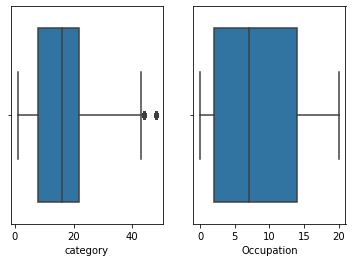

In [18]:
a=1
for i in ['category','Occupation']:
    plt.subplot(1,2,a)
    sns.boxplot(df[i])
    a+=1

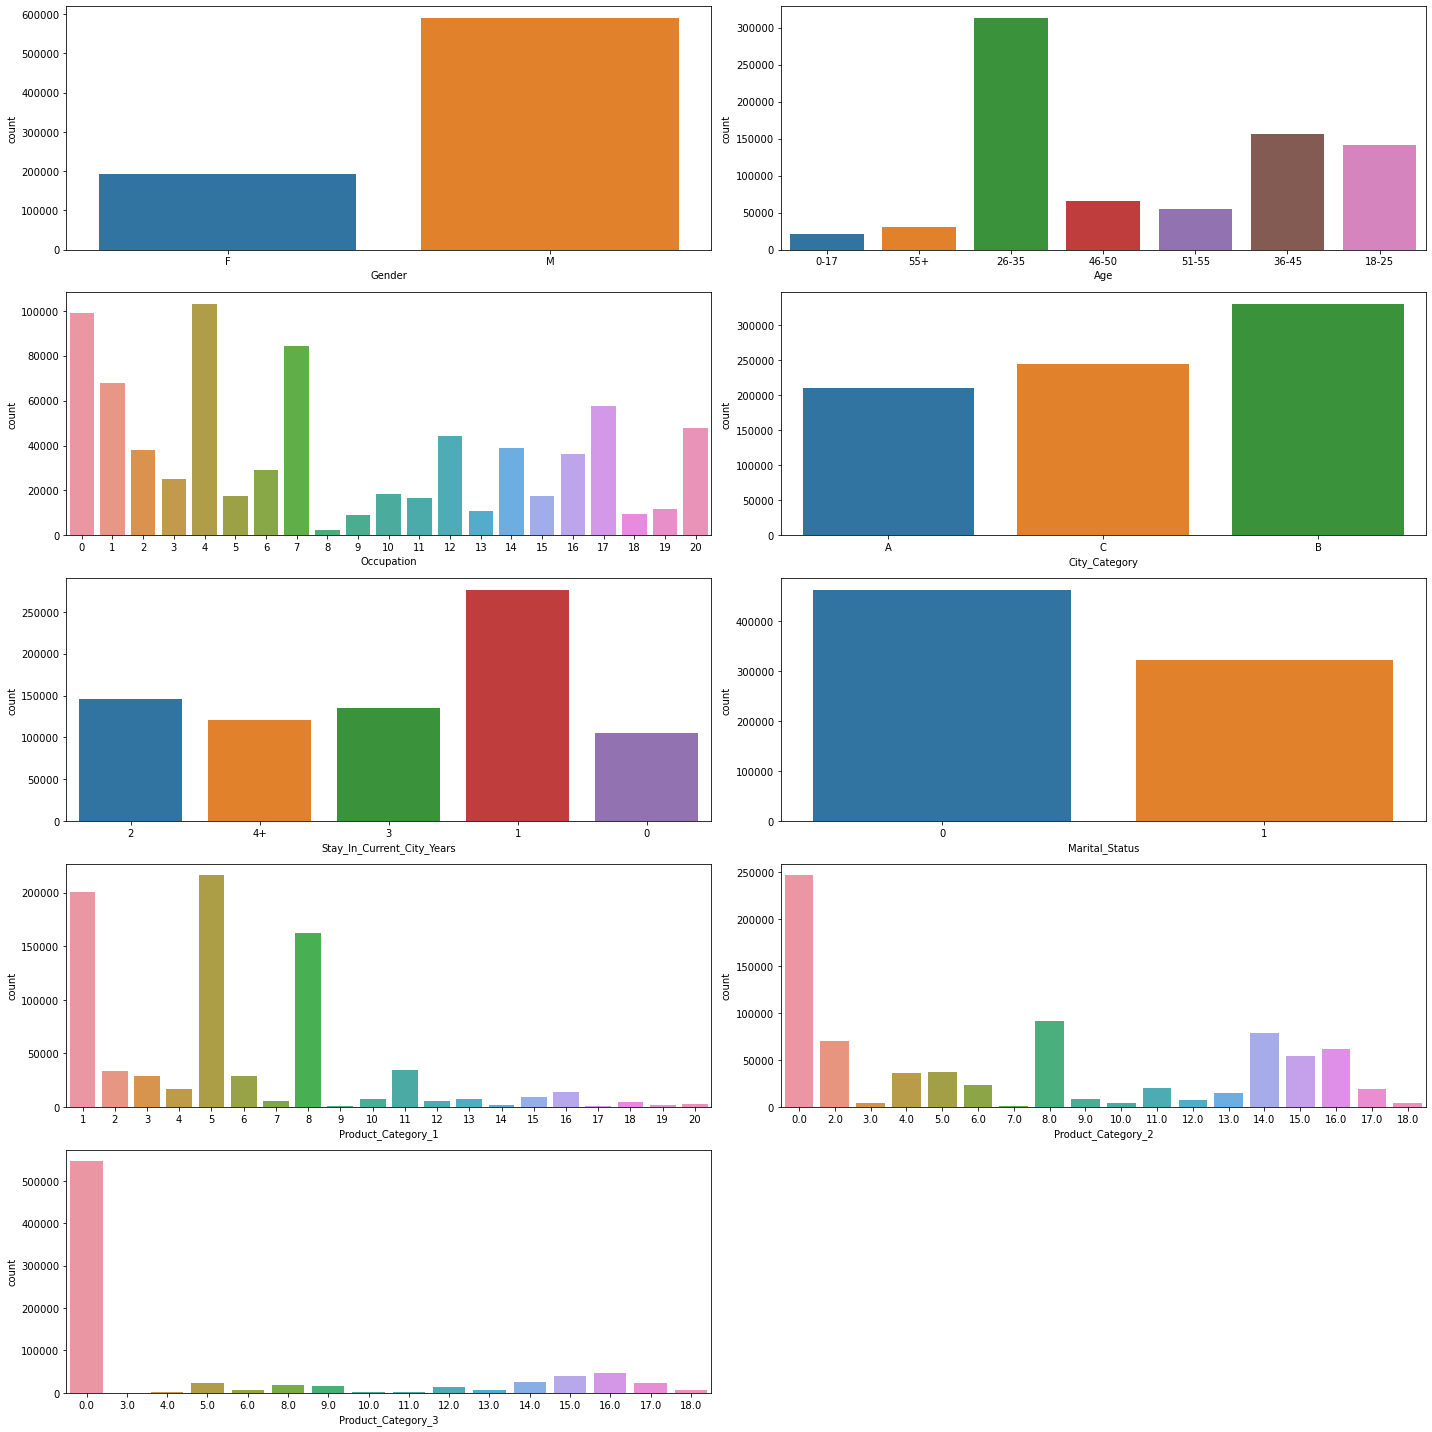

In [19]:
plt.figure(figsize=[20,20])
a=1
for i in df.columns:
    if i not in ['Purchase','category','User_ID','Product_ID']:
        plt.subplot(5,2,a)
        sns.countplot(df[i])
        a+=1
        plt.tight_layout()

### heatmap

<AxesSubplot:>

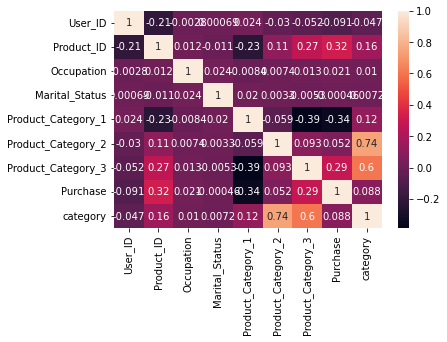

In [20]:
sns.heatmap(df.corr(),annot=True)

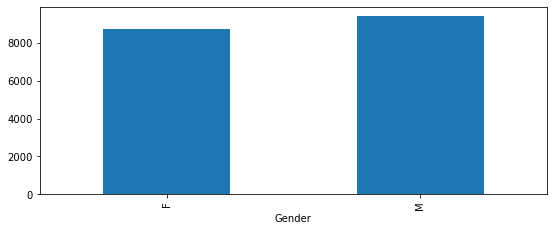

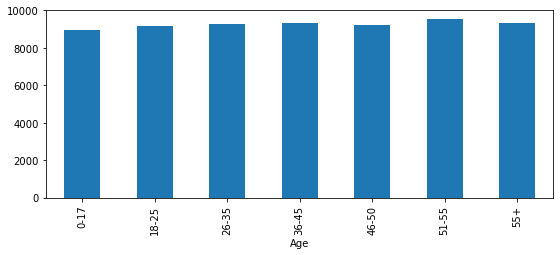

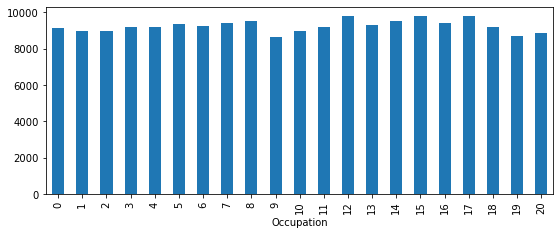

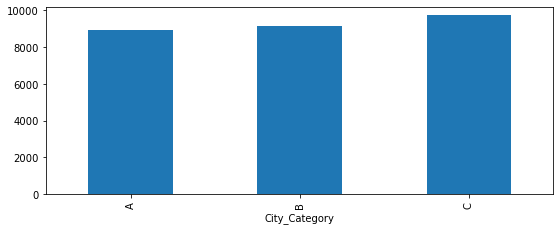

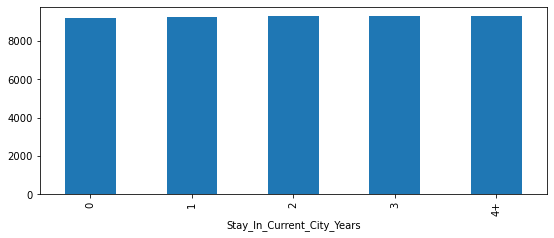

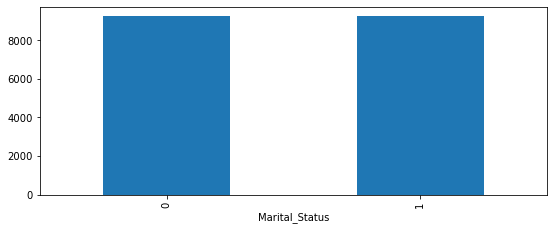

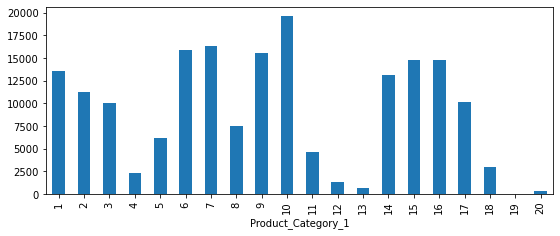

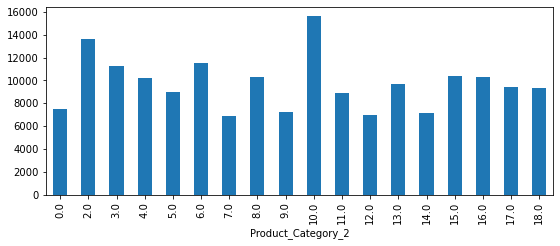

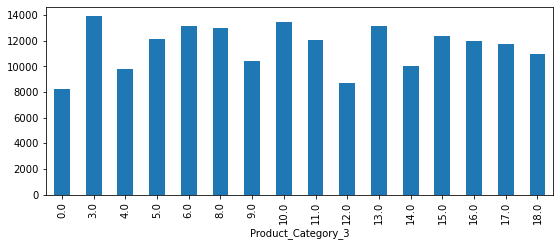

In [21]:
a=1
for i in df.columns:
    
    if i not in ['Purchase','category','User_ID','Product_ID']:
        plt.figure(figsize=[20,20])

        plt.subplot(5,2,a)
        df.groupby(by=[i])['Purchase'].mean().plot(kind='bar')
        plt.show()
        

### CATEGORICAL TREATMENT

In [22]:
df['Stay_In_Current_City_Years' ]=df['Stay_In_Current_City_Years'].str.replace('+','')	

In [23]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [24]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,category
0,0.000060,0.000439,F,0-17,10,A,2,0,3,0.0,0.0,8370.0,3.0
1,0.000060,0.001078,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,21.0
2,0.000060,0.000191,F,0-17,10,A,2,0,12,0.0,0.0,1422.0,12.0
3,0.000060,0.000633,F,0-17,10,A,2,0,12,14.0,0.0,1057.0,26.0
4,0.000137,0.000361,M,55+,16,C,4,0,8,0.0,0.0,7969.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0.000917,0.000288,F,26-35,15,B,4,1,8,0.0,0.0,NaN,8.0
233595,0.000917,0.000274,F,26-35,15,B,4,1,5,8.0,0.0,NaN,13.0
233596,0.000917,0.000343,F,26-35,15,B,4,1,1,5.0,12.0,NaN,18.0
233597,0.000208,0.000366,F,46-50,1,C,4,0,10,16.0,0.0,NaN,26.0


In [25]:
df_en=pd.get_dummies(df,drop_first=True)

In [26]:
df_en

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,category,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,0.000060,0.000439,10,2,0,3,0.0,0.0,8370.0,3.0,0,0,0,0,0,0,0,0,0
1,0.000060,0.001078,10,2,0,1,6.0,14.0,15200.0,21.0,0,0,0,0,0,0,0,0,0
2,0.000060,0.000191,10,2,0,12,0.0,0.0,1422.0,12.0,0,0,0,0,0,0,0,0,0
3,0.000060,0.000633,10,2,0,12,14.0,0.0,1057.0,26.0,0,0,0,0,0,0,0,0,0
4,0.000137,0.000361,16,4,0,8,0.0,0.0,7969.0,8.0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0.000917,0.000288,15,4,1,8,0.0,0.0,NaN,8.0,0,0,1,0,0,0,0,1,0
233595,0.000917,0.000274,15,4,1,5,8.0,0.0,NaN,13.0,0,0,1,0,0,0,0,1,0
233596,0.000917,0.000343,15,4,1,1,5.0,12.0,NaN,18.0,0,0,1,0,0,0,0,1,0
233597,0.000208,0.000366,1,4,0,10,16.0,0.0,NaN,26.0,0,0,0,0,1,0,0,0,1


In [27]:
train.shape,test.shape

((550068, 12), (233599, 11))

In [28]:
X_train=df_en.iloc[:550068,:].drop('Purchase',axis=1)

In [29]:
X_train

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,category,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,0.000060,0.000439,10,2,0,3,0.0,0.0,3.0,0,0,0,0,0,0,0,0,0
1,0.000060,0.001078,10,2,0,1,6.0,14.0,21.0,0,0,0,0,0,0,0,0,0
2,0.000060,0.000191,10,2,0,12,0.0,0.0,12.0,0,0,0,0,0,0,0,0,0
3,0.000060,0.000633,10,2,0,12,14.0,0.0,26.0,0,0,0,0,0,0,0,0,0
4,0.000137,0.000361,16,4,0,8,0.0,0.0,8.0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0.000066,0.001068,13,1,1,20,0.0,0.0,20.0,1,0,0,0,0,1,0,1,0
550064,0.000279,0.001039,1,3,0,20,0.0,0.0,20.0,0,0,1,0,0,0,0,0,1
550065,0.000917,0.001039,15,4,1,20,0.0,0.0,20.0,0,0,1,0,0,0,0,1,0
550066,0.000027,0.001039,1,2,0,20,0.0,0.0,20.0,0,0,0,0,0,0,1,0,1


In [30]:
X_test=df_en.iloc[550068:,:].drop('Purchase',axis=1)

In [31]:
X_test

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,category,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,0.000019,0.001701,7,2,1,1,11.0,0.0,12.0,1,0,0,0,1,0,0,1,0
1,0.000108,0.000473,17,0,0,3,5.0,0.0,8.0,1,0,1,0,0,0,0,0,1
2,0.000413,0.000277,1,4,1,5,14.0,0.0,19.0,0,0,0,1,0,0,0,1,0
3,0.000413,0.000029,1,4,1,4,9.0,0.0,13.0,0,0,0,1,0,0,0,1,0
4,0.000140,0.000997,1,1,0,4,5.0,12.0,21.0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0.000917,0.000288,15,4,1,8,0.0,0.0,8.0,0,0,1,0,0,0,0,1,0
233595,0.000917,0.000274,15,4,1,5,8.0,0.0,13.0,0,0,1,0,0,0,0,1,0
233596,0.000917,0.000343,15,4,1,1,5.0,12.0,18.0,0,0,1,0,0,0,0,1,0
233597,0.000208,0.000366,1,4,0,10,16.0,0.0,26.0,0,0,0,0,1,0,0,0,1


In [32]:
X_train

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,category,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,0.000060,0.000439,10,2,0,3,0.0,0.0,3.0,0,0,0,0,0,0,0,0,0
1,0.000060,0.001078,10,2,0,1,6.0,14.0,21.0,0,0,0,0,0,0,0,0,0
2,0.000060,0.000191,10,2,0,12,0.0,0.0,12.0,0,0,0,0,0,0,0,0,0
3,0.000060,0.000633,10,2,0,12,14.0,0.0,26.0,0,0,0,0,0,0,0,0,0
4,0.000137,0.000361,16,4,0,8,0.0,0.0,8.0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0.000066,0.001068,13,1,1,20,0.0,0.0,20.0,1,0,0,0,0,1,0,1,0
550064,0.000279,0.001039,1,3,0,20,0.0,0.0,20.0,0,0,1,0,0,0,0,0,1
550065,0.000917,0.001039,15,4,1,20,0.0,0.0,20.0,0,0,1,0,0,0,0,1,0
550066,0.000027,0.001039,1,2,0,20,0.0,0.0,20.0,0,0,0,0,0,0,1,0,1


In [33]:
y_train=df['Purchase'].iloc[:550068]

In [34]:
y_train

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [35]:
X_train.isna().sum()

User_ID                       0
Product_ID                    0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
category                      0
Gender_M                      0
Age_18-25                     0
Age_26-35                     0
Age_36-45                     0
Age_46-50                     0
Age_51-55                     0
Age_55+                       0
City_Category_B               0
City_Category_C               0
dtype: int64

In [36]:
import statsmodels.api as sm
X_train_c=sm.add_constant(X_train)
X_test_c=sm.add_constant(X_test)
model_l=sm.OLS(y_train,X_train_c).fit()

In [37]:
pred_l=model_l.predict(X_train_c)

In [38]:
model_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     8045.
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:47:41   Log-Likelihood:            -5.4070e+06
No. Observations:              550068   AIC:                         1.081e+07
Df Residuals:                  550050   BIC:                         1.081e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       8406.3666     45.184    186.048      0.000    8317.808    8494.925
User_ID                    -4.819e+05    2.3e+04    -20.944      0.000   -5.27e+05   -4.37e+05
Product_ID                  1.691e+06   9877.276    171.151      0.000    1.67e+06    1.71e+06
Occupation                     4.8090      0.943      5.098      0.000       2.960       6.658
Stay_In_Current_City_Years    10.6786      4.709      2.268      0.023       1.450      19.907
Marital_Status               -41.0393     13.131     -3.125      0.002     -66.775     -15.304
Product_Category_1          -257.5802      1.218   -211.503      0.000    -259.967    -255.193
Product_Category_2            49.1326      0.938     52.362      0.000      47.294      50.972
Product_Category_3           157.7422      0.826    191.024      0.000     156.124     159.361
category                     -50.7053      0.622    -81.517      0.000     -51.924     -49.486
Gender_M                     479.2062     14.249     33.630      0.000     451.278     507.134
Age_18-25                    234.4494     39.514      5.933      0.000     157.003     311.896
Age_26-35                    444.2377     38.383     11.574      0.000     369.007     519.468
Age_36-45                    581.5355     39.478     14.731      0.000     504.160     658.911
Age_46-50                    611.0906     43.335     14.101      0.000     526.154     696.027
Age_51-55                    858.2027     44.243     19.397      0.000     771.487     944.918
Age_55+                      707.7466     48.535     14.582      0.000     612.619     802.874
City_Category_B               23.7188     15.461      1.534      0.125      -6.585      54.023
City_Category_C              144.1759     18.951      7.608      0.000     107.032     181.319
==============================================================================
Omnibus:                    56416.223   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78887.316
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       3.874   Cond. No.                     1.74e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.31e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

In [41]:
pd.DataFrame({'VIF':vif[:]},index=X_train.columns)

,VIF
User_ID,3.390083
Product_ID,2.810418
Occupation,2.555340
Stay_In_Current_City_Years,2.998020
Marital_Status,1.922568
Product_Category_1,inf
Product_Category_2,inf
Product_Category_3,inf
category,inf
Gender_M,4.048891


In [42]:
X_train.drop(['category'],axis=1,inplace=True)

In [43]:
vif=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
pd.DataFrame({'VIF':vif[:]},index=X_train.columns)

,VIF
User_ID,3.390083
Product_ID,2.810432
Occupation,2.555441
Stay_In_Current_City_Years,2.998060
Marital_Status,1.922568
Product_Category_1,3.236275
Product_Category_2,2.177205
Product_Category_3,1.671808
Gender_M,4.049516
Age_18-25,3.326944


In [44]:
import statsmodels.api as sm
X_train_c=sm.add_constant(X_train)
X_test_c=sm.add_constant(X_test)
model_l=sm.OLS(y_train,X_train_c).fit()

In [45]:
model_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     8045.
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:48:12   Log-Likelihood:            -5.4070e+06
No. Observations:              550068   AIC:                         1.081e+07
Df Residuals:                  550050   BIC:                         1.081e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       8406.3666     45.184    186.048      0.000    8317.808    8494.925
User_ID                    -4.819e+05    2.3e+04    -20.944      0.000   -5.27e+05   -4.37e+05
Product_ID                  1.691e+06   9877.276    171.151      0.000    1.67e+06    1.71e+06
Occupation                     4.8090      0.943      5.098      0.000       2.960       6.658
Stay_In_Current_City_Years    10.6786      4.709      2.268      0.023       1.450      19.907
Marital_Status               -41.0393     13.131     -3.125      0.002     -66.775     -15.304
Product_Category_1          -308.2855      1.691   -182.357      0.000    -311.599    -304.972
Product_Category_2            -1.5727      0.984     -1.599      0.110      -3.501       0.355
Product_Category_3           107.0369      1.075     99.613      0.000     104.931     109.143
Gender_M                     479.2062     14.249     33.630      0.000     451.278     507.134
Age_18-25                    234.4494     39.514      5.933      0.000     157.003     311.896
Age_26-35                    444.2377     38.383     11.574      0.000     369.007     519.468
Age_36-45                    581.5355     39.478     14.731      0.000     504.160     658.911
Age_46-50                    611.0906     43.335     14.101      0.000     526.154     696.027
Age_51-55                    858.2027     44.243     19.397      0.000     771.487     944.918
Age_55+                      707.7466     48.535     14.582      0.000     612.619     802.874
City_Category_B               23.7188     15.461      1.534      0.125      -6.585      54.023
City_Category_C              144.1759     18.951      7.608      0.000     107.032     181.319
==============================================================================
Omnibus:                    56416.223   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78887.316
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       3.874   Cond. No.                     5.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

In [53]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
